# Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Importing Data

In [3]:
df=pd.read_csv("credit card.csv")

# Understaing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
df.head(10)
df.tail(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
9990,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,0,53667.08,0
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,0,69384.71,1
9992,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,0,195192.40,0
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,0,29179.52,0
9994,15719294,Wood,800,France,Female,29,2,0.00,2,0,167773.55,0
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,0,38190.78,0


# Data Cleaning

1. Checking for duplicates

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

2. Droping duplicates if any

In [7]:
df = df.drop_duplicates()

3. Checking for null values

In [8]:
df.tail(10).isnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
9990,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False
9993,False,False,False,False,False,False,False,False,False,False,False,False
9994,False,False,False,False,False,False,False,False,False,False,False,False
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False
9999,False,False,False,False,False,False,False,False,False,False,False,False


4. Removing unwanted column Surname

In [9]:
df=df.drop(columns=['Surname'],axis=1)

# Data Transformation and Feature engeneering

In [10]:
df['Age_Catagory']=pd.cut(x=df['Age'],bins=[18,25,40,55],labels=['Youth','Adult','Senior'])

In [11]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Age_Catagory
0,15634602,619,France,Female,42,2,0.00,1,1,101348.88,1,Senior
1,15647311,608,Spain,Female,41,1,83807.86,1,1,112542.58,0,Senior
2,15619304,502,France,Female,42,8,159660.80,3,0,113931.57,1,Senior
3,15701354,699,France,Female,39,1,0.00,2,0,93826.63,0,Adult
4,15737888,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,0,96270.64,0,Adult
9996,15569892,516,France,Male,35,10,57369.61,1,1,101699.77,0,Adult
9997,15584532,709,France,Female,36,7,0.00,1,1,42085.58,1,Adult
9998,15682355,772,Germany,Male,42,3,75075.31,2,0,92888.52,1,Senior


# Data analysis

1. Number of customers

In [12]:
df.shape[0]

10000

2. Gender wise cusomer count

In [13]:
g=df.groupby('Gender')
g['Gender'].count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

3. Credit Score based on salary

In [14]:
pd.pivot_table(df,index='CreditScore',values='EstimatedSalary',aggfunc='mean')

,EstimatedSalary
CreditScore,
350,145503.350000
351,169621.690000
358,141959.110000
359,146955.710000
363,100615.140000
...,...
846,79433.830000
847,98229.076667
848,130616.958000


4. Get average Credit score and balance for each age catagory and gender

In [15]:
pd.pivot_table(df,index=['Age_Catagory','Gender'],values=['CreditScore','Balance'],aggfunc=['mean'])

C:\Users\Varun\AppData\Local\Temp\ipykernel_14440\3750403756.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,index=['Age_Catagory','Gender'],values=['CreditScore','Balance'],aggfunc=['mean'])


mean            
                          Balance CreditScore
Age_Catagory Gender                          
Youth        Female  77709.273358  646.361940
             Male    72634.643333  652.735202
Adult        Female  73614.234254  652.469809
             Male    75786.929352  650.464363
Senior       Female  78462.631809  648.987131
             Male    81036.163863  647.347260

 1. What is the distribution of credit card balances among customers?

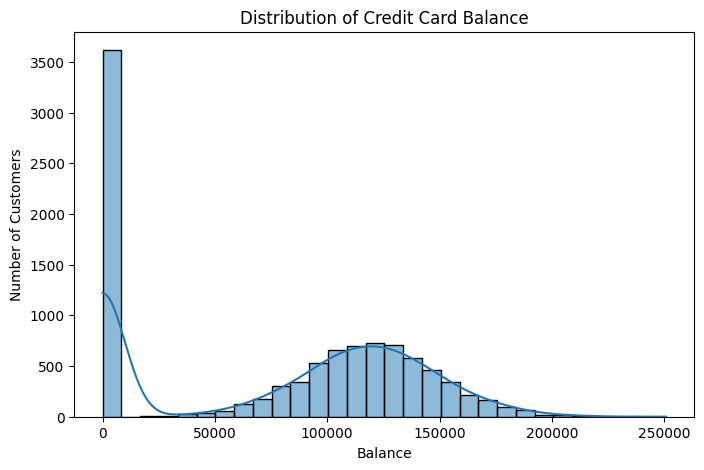

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title("Distribution of Credit Card Balance")
plt.xlabel("Balance")
plt.ylabel("Number of Customers")
plt.show()

2. Distribution of Customer Churn

Text(0, 0.5, 'Number of Customers')

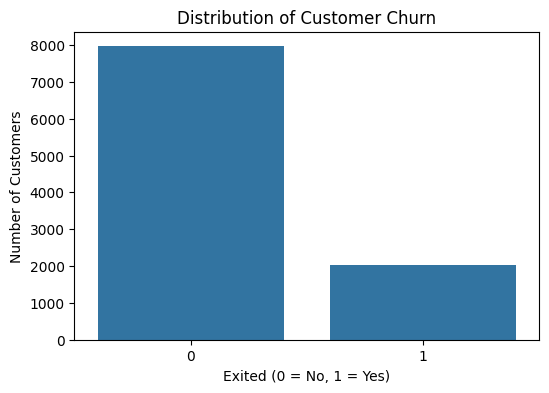

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')

This bar plot shows the count of customers who have exited (churned) the bank versus those who have not.

3. Distribution of Credit Scores

Text(0, 0.5, 'Frequency')

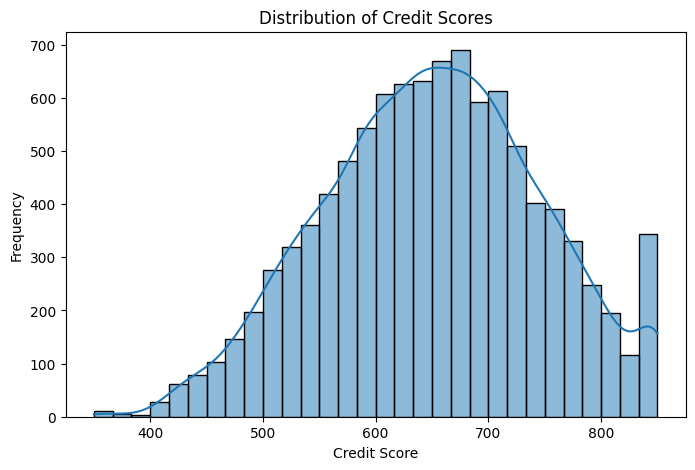

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

This histogram illustrates the distribution of credit scores among the customers, providing insights into the most common credit score ranges.

4. Balance vs. Age

Text(0, 0.5, 'Balance')

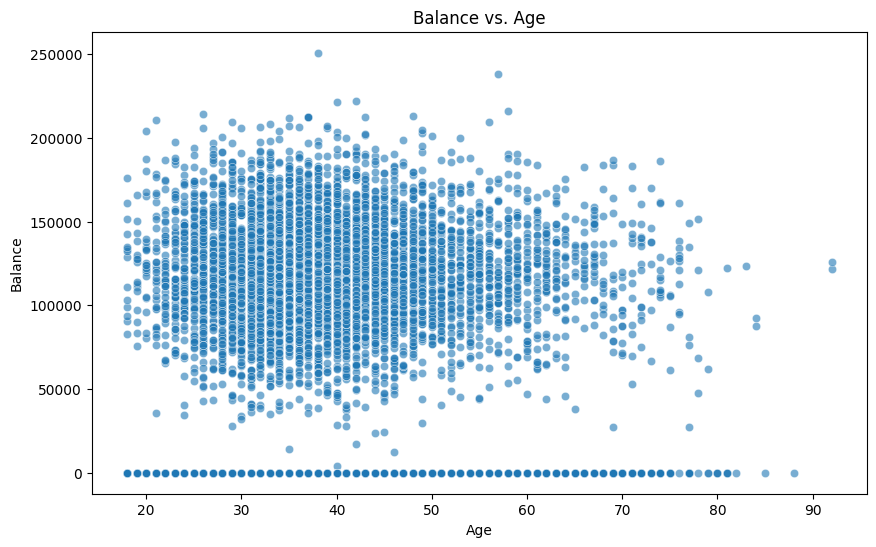

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', data=df, alpha=0.6)
plt.title('Balance vs. Age')
plt.xlabel('Age')
plt.ylabel('Balance')

This scatter plot visualizes the relationship between a customer's age and their bank balance.

5. Customer Churn by Geography

Text(0, 0.5, 'Number of Customers')

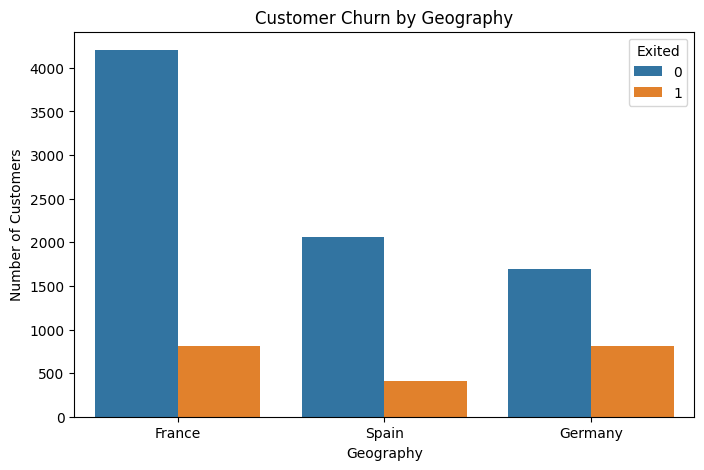

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Customer Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')

This bar plot compares the number of churned and non-churned customers across different geographical locations.

# Conclution

This dataset gives us an understanding about coustomers using there creditcards , for buying and their bank balance ,how these things affect the credit score 